## Project #5: Survival Analysis: Cox Proportional Hazards Regression and Kaplan Meier Analysis

Lillian Jensen

**Goal**

Students will use R to conduct and interpret a Cox Proportional Hazards Regression and Kaplan Meier Analyses and compare the results. 

Note: We are using data from the Framingham Heart Study for this analysis.  Framingham is one of the longest running longitudinal studies following the same population for several decades.  You can access more about the study [here](https://www.framinghamheartstudy.org/)  if you wish to learn more about it.

In this problem set, you will be comparing Kaplan Meier Analysis results with the Cox Regression results.


---

## Part 1

Run a Cox Proportional Hazards Regression using the following variables from the dataset: TimeDeathYears as the “Time” variable. Death as the “Status” variable.  Use cursmoke, diabetes, educ, prevchd, age, bmi, and sex as the covariates.  For the categorical variables, make sure that not a current smoker, no diabetes, the lowest education category, no CHD, and female sex are all reference categories (All of these are the lowest coded values for each). As a refresher:

Import your data, account for missing values if necessary, determine which variables are categorical (see the codebook). For categorical variables, remember to convert them to factor variables


In [7]:
# Setting up code environment
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(survival))
suppressPackageStartupMessages(library(fastDummies))

Warning message:
"package 'fastDummies' was built under R version 4.2.3"


In [19]:
df <- read.csv("C:\\Users\\ljens\\Downloads\\HM 878 730 Clements - Survival Analysis R Data.csv")

In [20]:
colnames(df)

[1] "randid"         "TimeDeathYears" "death"          "cursmoke"      
 [5] "diabetes"       "educ"           "prevchd"        "age"           
 [9] "bmi"            "sex"

In [21]:
summary(df)

     randid        TimeDeathYears      death           cursmoke     
 Min.   :   2448   Min.   : 2.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:2509944   1st Qu.:15.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :5050572   Median :15.00   Median :0.0000   Median :0.0000  
 Mean   :5028933   Mean   :13.57   Mean   :0.2375   Mean   :0.3435  
 3rd Qu.:7501310   3rd Qu.:15.00   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :9999312   Max.   :15.00   Max.   :1.0000   Max.   :1.0000  
                                                                    
    diabetes            educ          prevchd            age       
 Min.   :0.00000   Min.   :1.000   Min.   :0.0000   Min.   :44.00  
 1st Qu.:0.00000   1st Qu.:1.000   1st Qu.:0.0000   1st Qu.:54.00  
 Median :0.00000   Median :2.000   Median :0.0000   Median :60.00  
 Mean   :0.07784   Mean   :2.014   Mean   :0.1103   Mean   :60.65  
 3rd Qu.:0.00000   3rd Qu.:3.000   3rd Qu.:0.0000   3rd Qu.:67.00  
 Max.   :1.00000   Max.   :4.000   Max. 

In [26]:
df <- cbind(df, dummy_cols(df$educ, remove_first_dummy = TRUE))

In [27]:
colnames(df)

[1] "randid"         "TimeDeathYears" "death"          "cursmoke"      
 [5] "diabetes"       "educ"           "prevchd"        "age"           
 [9] "bmi"            "sex"            ".data"          ".data_2"       
[13] ".data_3"        ".data_4"        ".data_NA"

In [28]:
df <- rename(df, 
        #"0-11 years"= '.data_1', 
        "HSdiploma.or.GED" = '.data_2', 
        "some.college" = '.data_3', 
        "college.degree" = '.data_4'
            )

In [29]:
df <- subset(df, select = -c(.data,.data_NA))

In [30]:
head(df)

,randid,TimeDeathYears,death,cursmoke,diabetes,educ,prevchd,age,bmi,sex,HSdiploma.or.GED,some.college,college.degree
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,2448,15,0,0,0,4,0,52,NA,1,0,0,1
2,6238,15,0,0,0,2,0,58,28.50,0,1,0,0
3,11252,15,0,1,0,3,0,58,24.61,0,0,1,0
4,11263,15,0,0,1,2,0,55,31.17,0,1,0,0
5,12806,15,0,1,0,2,0,57,22.02,0,1,0,0
6,14367,15,0,0,0,1,0,64,25.72,1,0,0,0


In [34]:
cox.model <- coxph(
                    Surv(TimeDeathYears, death) ~ 
                    cursmoke + diabetes + prevchd + 
                    age + bmi + sex + HSdiploma.or.GED + 
                    some.college + college.degree,
                    data=df
                    )

summary(cox.model)

Call:
coxph(formula = Surv(TimeDeathYears, death) ~ cursmoke + diabetes + 
    prevchd + age + bmi + sex + HSdiploma.or.GED + some.college + 
    college.degree, data = df)

  n= 3165, number of events= 746 
   (98 observations deleted due to missingness)

                      coef exp(coef)  se(coef)      z Pr(>|z|)    
cursmoke          0.432597  1.541256  0.081165  5.330 9.83e-08 ***
diabetes          0.741622  2.099338  0.100251  7.398 1.39e-13 ***
prevchd           0.790013  2.203425  0.086862  9.095  < 2e-16 ***
age               0.092917  1.097370  0.005068 18.333  < 2e-16 ***
bmi              -0.012792  0.987290  0.009667 -1.323  0.18575    
sex               0.672732  1.959583  0.075393  8.923  < 2e-16 ***
HSdiploma.or.GED -0.007861  0.992169  0.092149 -0.085  0.93201    
some.college     -0.158231  0.853652  0.111205 -1.423  0.15477    
college.degree   -0.454487  0.634773  0.131159 -3.465  0.00053 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

     

In [35]:
curvy.survival.diabetes <- survfit(
                                    Surv(TimeDeathYears, death) ~ 
                                    diabetes, 
                                    data=df
                                    )

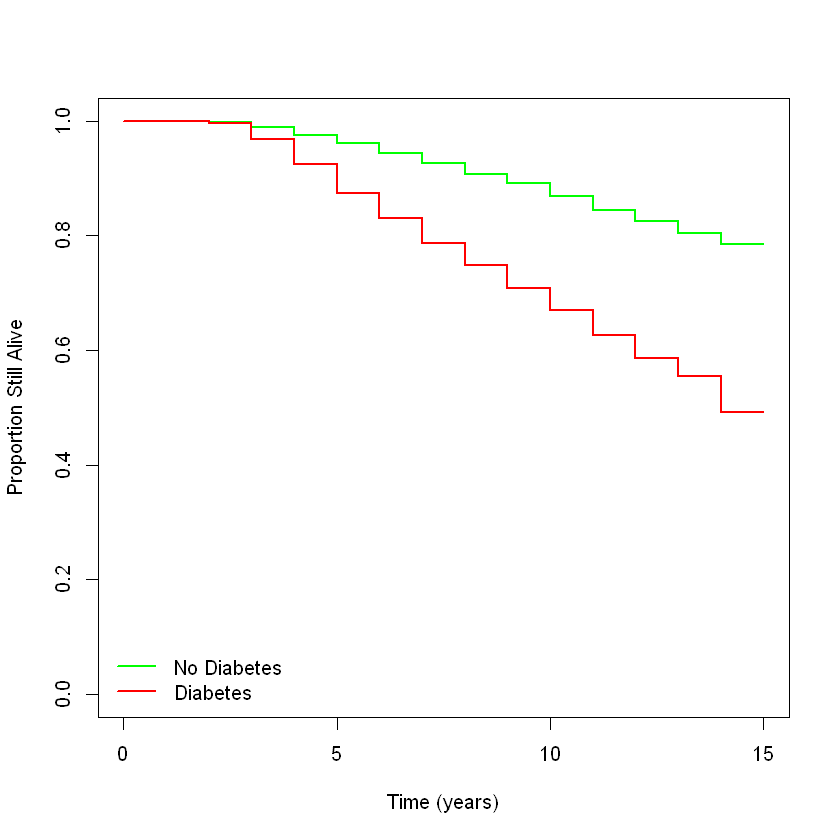

In [51]:
plot(
    curvy.survival.diabetes, 
    xlab='Time (years)', 
    ylab='Proportion Still Alive',
    lwd=2,
    conf.int=F, 
    col = c('green','red')
    ) 

legend(
    'bottomleft',
    #legend=df$'diabetes',
    legend = c('No Diabetes','Diabetes'),
    col=c('green','red'),
    lwd=2,bty='n'
    )

1. Fully interpret the hazard ratios for each IV (p-values, HR, and 95% HR are boxed on the table above) and the survival curve.

---

## Part 2

Run Kaplan Meier analyses with “Time Since Baseline” as the Time to Event variable, and death as the Event Status Variable.  Run five separate analyses (survival curves) with each of the categorical variables as the “Factor” variable. You can only include one IV at a time, so you’ll need to run it five times (one for each IV) to get the results. You can’t used this procedure for the continuous numerical variables (age, bmi).


In [52]:
colnames(df)

[1] "randid"           "TimeDeathYears"   "death"            "cursmoke"        
 [5] "diabetes"         "educ"             "prevchd"          "age"             
 [9] "bmi"              "sex"              "HSdiploma.or.GED" "some.college"    
[13] "college.degree"

In [68]:
df$smoke <- factor(df$cursmoke)

In [69]:
km.cursmoke.0 <- survfit(Surv(TimeDeathYears, death) ~ 1, data = df)
km.cursmoke.1 <- survfit(Surv(TimeDeathYears, death) ~
smoke, data=df
)

In [70]:
km.cursmoke.1

Call: survfit(formula = Surv(TimeDeathYears, death) ~ smoke, data = df)

           n events median 0.95LCL 0.95UCL
smoke=0 2142    501     NA      NA      NA
smoke=1 1121    274     NA      NA      NA

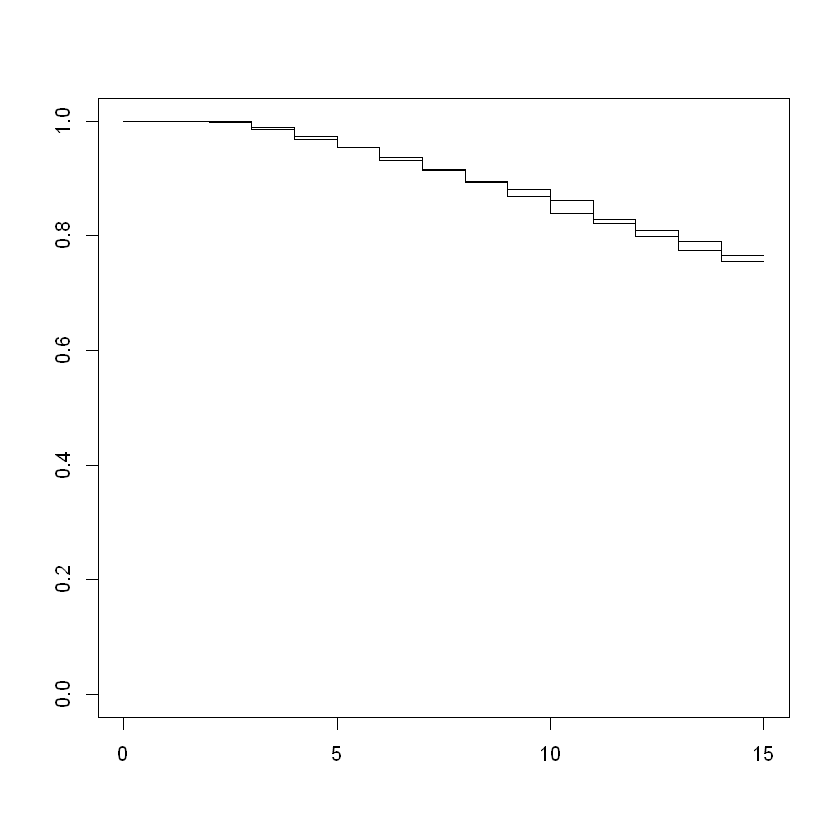

In [71]:
plot(km.cursmoke.1)

In [72]:
print(km.cursmoke.1, print.rmean = T)

Call: survfit(formula = Surv(TimeDeathYears, death) ~ smoke, data = df)

           n events rmean* se(rmean) median 0.95LCL 0.95UCL
smoke=0 2142    501   13.6    0.0649     NA      NA      NA
smoke=1 1121    274   13.5    0.0922     NA      NA      NA
    * restricted mean with upper limit =  15 


In [73]:
quantile(km.cursmoke.1, probs = c(0.5))

,50
smoke=0,NA
smoke=1,NA
,50
smoke=0,NA
smoke=1,NA
,50
smoke=0,NA
smoke=1,NA


---

1. For each Kaplan Meier Analysis:

    • Interpret the summary: 

        > print(MODEL_NAME)

    • Calculate and interpret the mean survival time: 

        > print(MODEL_NAME, print.rmean = TRUE)

    • Calculate and interpret the median survival time: 

        > quantile(MODEL_NAME, probs = c(0.5))

    • Calculate and interpret the Log Rank Mantel-Cox Test

        > log_rank_test_IV <- survdiff(Surv(Time to Event Variable, Event Status Variable) ~ IV, data = data)

        > print(log_rank_test_IV)

    • Survival Curves – estimate survival probability at 10 years for each group in the respective plots.

    • Compare and contrast these results for each of the categorical variables.


---

2. Compare and contrast the “Log Rank Mantel-Cox Test” for each Kaplan Meier analysis to the model fit statistics from the Cox Proportional Hazards Regression Do the results from each align with each other? Describe why or why not. In other words, are the results you get from one expected, based on the results of the other?


---

3. Finally, describe situations when you would use these two analyses. When would you use a Cox Regression and when would you use a Kaplan Meier analysis? Is one better than the other?